## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neaurons=[512, 256 ,128 ,64], l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neaurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
l1_exp = [1e-2, 1e-4, 1e-8]
l2_exp = [1e-2, 1e-4, 1e-8,]

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1_ratio in l1_exp:
    for l2_ratio in l2_exp:
        keras.backend.clear_session()
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1_ratio, l2_ratio=l2_ratio)
        
        optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=momentum)
        model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
        
        model.fit(x_train, y_train, 
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=(x_test,y_test),
                  shuffle=True)
        
        train_loss=model.history.history['loss']
        train_acc=model.history.history['accuracy']
        valid_loss=model.history.history['val_loss']
        valid_acc=model.history.history['val_accuracy']
        
        tag = "l1_ratio=%s, l2_ratio=%s" % (str(l1_ratio), str(l2_ratio))
        results[tag] = {'train_loss':train_loss,
                        'valid_loss':valid_loss,
                        'train_acc':train_acc,
                        'valid_acc':valid_acc}


Epoch 1/50
196/196 [==============================] - 1s 5ms/step - loss: 204.2626 - accuracy: 0.2100 - val_loss: 40.4577 - val_accuracy: 0.1444
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 19.0598 - accuracy: 0.1013 - val_loss: 7.0578 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 4.3135 - accuracy: 0.0978 - val_loss: 2.9191 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 2.6081 - accuracy: 0.0979 - val_loss: 2.4656 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 2.4634 - accuracy: 0.0992 - val_loss: 2.4631 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 2.4631 - accuracy: 0.0969 - val_loss: 2.4631 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 2.4631 - accuracy: 0.0983 - val_loss: 2.4632 - val_accuracy: 0.1000
Ep

In [21]:
"l1_ratio= %s, l2_ratio=%s " % (str(l1_ratio), str(l2_ratio))

'l1_ratio= 0.01, l2_ratio=0.01 '

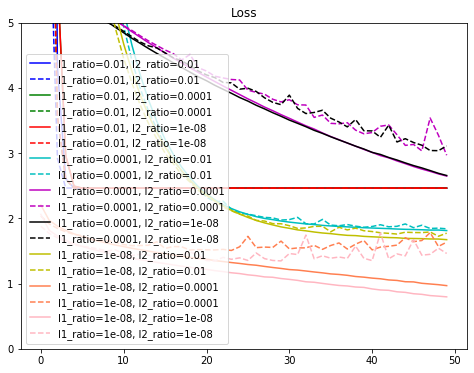

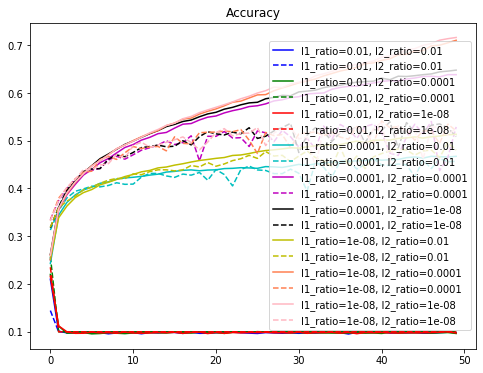

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['b','g','r','c','m','k','y','coral','lightpink']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()